Importing file and packages


In [10]:
#importing the necessary variables 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import files


Importing Arrays


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Problem 1

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
x1 = breast.data
y1 = breast.target

model = GaussianNB()

model.fit(x1,y1)
print(model)

#making the predictions
expected = y1
predicted = model.predict(x1)

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


#Problem 2


In [53]:
x2PCA = StandardScaler().fit_transform(x1)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x2PCA)


X2_train, X2_test, Y2_train, Y2_test = train_test_split(principalComponents, y1, test_size = 0.20, random_state = 0)

sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X2_train)
X2_test = sc_X.transform(X2_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X2_train, Y2_train)

Y2_pred = classifier.predict(X2_test)

cnf_matrix3 = confusion_matrix(Y2_test, Y2_pred)


print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred)*100.0)
print("Precision:",metrics.precision_score(Y2_test, Y2_pred)*100.0)
print("Recall:",metrics.recall_score(Y2_test, Y2_pred)*100.0)

Accuracy: 95.6140350877193
Precision: 94.28571428571428
Recall: 98.50746268656717


Text(0.5, 427.9555555555555, 'Predicted label')

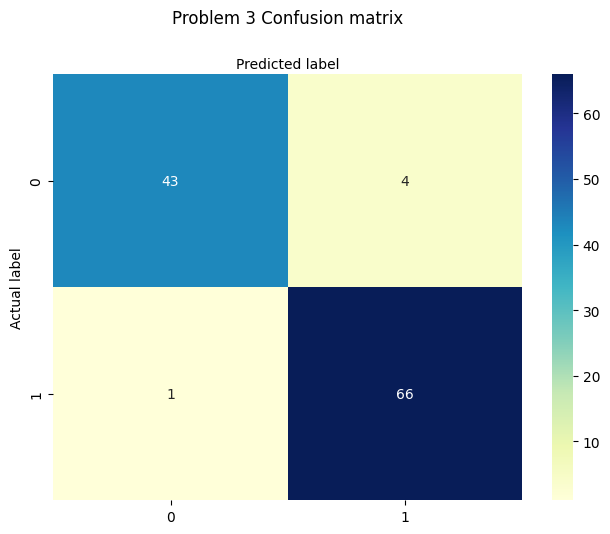

In [54]:
class_names3=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names3))
plt.xticks(tick_marks, class_names3)
plt.yticks(tick_marks, class_names3)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Problem 3 Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Problem 3


In [46]:
x3 = StandardScaler().fit_transform(x1)
y3=pd.DataFrame(y1)
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x3)

model.fit(principalComponents,y3)
print(model)

#making the predictions
expected3 = y3
predicted3 = model.predict(principalComponents)

print(metrics.classification_report(expected3,predicted3))
print(metrics.confusion_matrix(expected3,predicted3))

GaussianNB()
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       212
           1       0.89      0.94      0.91       357

    accuracy                           0.89       569
   macro avg       0.89      0.87      0.88       569
weighted avg       0.89      0.89      0.88       569

[[169  43]
 [ 22 335]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
